In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\2nd-sem\\data-science_workflow\\airbnb_price_prediction\\data\\cleaned_data\\clean_airbnb_data.csv")

In [5]:
df = df[df['price'] <= 400]

In [7]:
X = df.drop(columns='price',axis=1)

In [9]:
y = df['price']

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf = RandomForestRegressor(random_state=42)

In [19]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
y_pred_rf = rf.predict(X_test)

In [25]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [58]:
print("📈 Random Forest Results:")
print(f"MAE:  {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²:   {r2_rf:.2f}")

📈 Random Forest Results:
MAE:  31.73
RMSE: 43.52
R²:   0.63


In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'n_estimators': [100, 200],           
    'max_depth': [10, 20, None],           
    'min_samples_split': [2, 5],           
    'min_samples_leaf': [1, 2],            
}

In [33]:
rf = RandomForestRegressor(random_state=42)

In [35]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [37]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [39]:
best_rf = grid_search.best_estimator_

In [41]:
y_pred_best = best_rf.predict(X_test)

In [43]:
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

In [45]:
print("📈 Tuned Random Forest Results:")
print(f"Best Params: {grid_search.best_params_}")
print(f"MAE:  {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²:   {r2_best:.2f}")

📈 Tuned Random Forest Results:
Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
MAE:  31.72
RMSE: 43.40
R²:   0.63


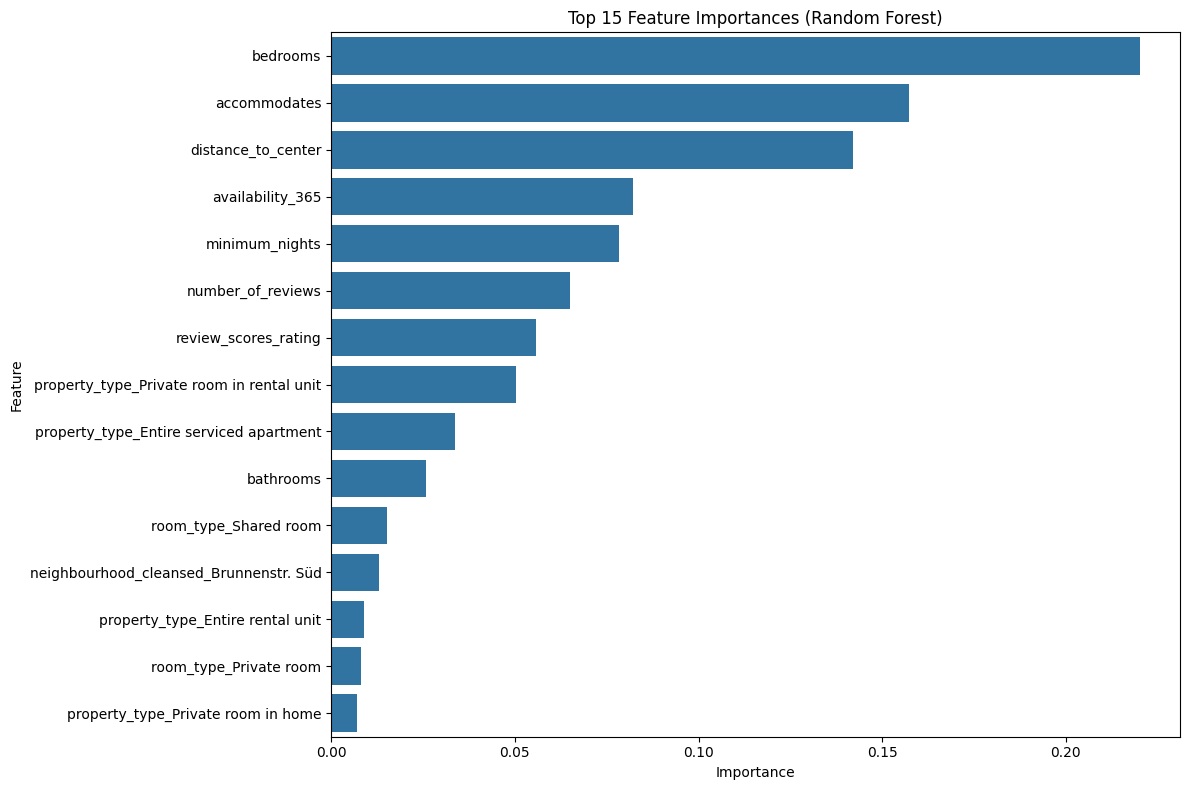

In [55]:
# -------------------------------------------------------------
# Feature Importance from Random Forest
# -------------------------------------------------------------
best_rf = grid_search.best_estimator_   # get the trained best RF model
importances = best_rf.feature_importances_  # feature importance scores
feature_names = X.columns  # original feature names

# Create DataFrame for feature importance
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()